<a href="https://colab.research.google.com/github/Saifullah785/deep-learning-ai-journey/blob/main/Lecture_16_Weight_Initialization_Techniques/Lecture_16_zero_initialization_sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
# Load the dataset
df = pd.read_csv('ushape.csv')

In [29]:
# Display the first 5 rows of the dataframe
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


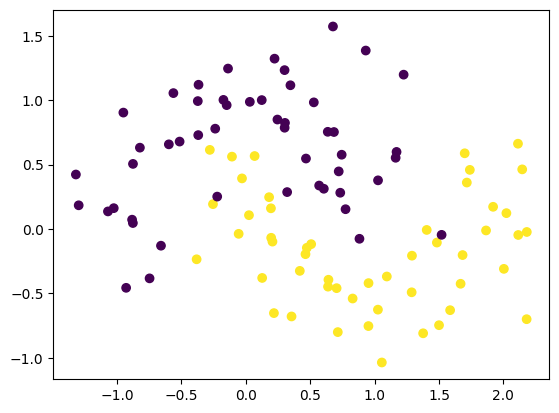

In [30]:
# Create a scatter plot of the data, coloring points by class
plt.scatter(df['X'],df['Y'],c=df['class'])

In [31]:
# Separate features (x) and target variable (y)
x = df.iloc[:,0:2].values
y = df.iloc[:, -1].values

In [32]:
# Import TensorFlow and Keras
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [33]:
# Define the neural network model
# model = Sequential()
# model.add(Dense(2, activation='relu', input_dim=2))
# model.add(Dense(1, activation='sigmoid'))

# model.summary()

# Define a Sequential model
model = Sequential()
# Add a Dense layer with 10 neurons and sigmoid activation, input dimension is 2
model.add(Dense(10, activation='sigmoid', input_dim=2))
# Add a Dense layer with 1 neuron and sigmoid activation for output
model.add(Dense(1, activation='sigmoid'))

# Display the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Get the initial weights of the model
model.get_weights()

[array([[ 0.60012   , -0.5700538 ,  0.5331846 ,  0.15106559, -0.04889101,
          0.5410258 ,  0.38289136,  0.45954567,  0.35842997,  0.01704991],
        [ 0.19750029, -0.593009  , -0.13147354,  0.1716122 , -0.25758046,
          0.3277039 ,  0.6138101 , -0.2750306 ,  0.534517  , -0.2868356 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.68614346],
        [-0.6312188 ],
        [-0.3335187 ],
        [ 0.13244581],
        [ 0.4770767 ],
        [-0.24543631],
        [-0.27063584],
        [-0.11091447],
        [ 0.22772723],
        [-0.14305383]], dtype=float32),
 array([0.], dtype=float32)]

In [35]:
# Store the initial weights
initial_weights = model.get_weights()

In [36]:
# Set all initial weights to zeros
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [37]:
# Set the model's weights to the zeroed initial weights
model.set_weights(initial_weights)

In [38]:
# Get and display the weights after setting them to zeros
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [39]:
# Compile the model with binary crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [40]:
# Train the model for 100 epochs with a validation split of 0.2
history = model.fit(x,y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.4508 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5078 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4844 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4883 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4805 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.4805 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5039 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4570 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss

In [41]:
# Get and display the final weights of the trained model
model.get_weights()

[array([[-0.46738765, -0.46738765, -0.46738765, -0.46738765, -0.46738765,
         -0.46738765, -0.46738765, -0.46738765, -0.46738765, -0.46738765],
        [ 0.4825581 ,  0.4825581 ,  0.4825581 ,  0.4825581 ,  0.4825581 ,
          0.4825581 ,  0.4825581 ,  0.4825581 ,  0.4825581 ,  0.4825581 ]],
       dtype=float32),
 array([-0.09835792, -0.09835792, -0.09835792, -0.09835792, -0.09835792,
        -0.09835792, -0.09835792, -0.09835792, -0.09835792, -0.09835792],
       dtype=float32),
 array([[-0.0633322],
        [-0.0633322],
        [-0.0633322],
        [-0.0633322],
        [-0.0633322],
        [-0.0633322],
        [-0.0633322],
        [-0.0633322],
        [-0.0633322],
        [-0.0633322]], dtype=float32),
 array([0.0642456], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


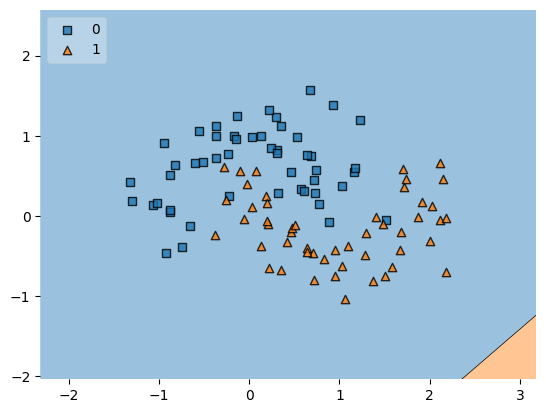

In [42]:
# Import plot_decision_regions for visualizing decision boundary
from mlxtend.plotting import plot_decision_regions
# Plot the decision boundary of the trained model
plot_decision_regions(x, y.astype('int') ,clf=model, legend=2)
# Display the plot
plt.show()